In [1]:
from IPython import get_ipython
from IPython.display import display
# %%
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %%
username = 'recipesadmin'
password = 'HomeUG1000'
host = 'recipesdb.cpamk8qk2wid.us-east-2.rds.amazonaws.com'
port = '5432'
database = 'postgres'

In [2]:
engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')

df = pd.read_sql_table("recipes_processed", con=engine)
df.head()

,Name,CookTime,PrepTime,TotalTime,Description,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,...,Time_Difference,Ingredient_Count,Unique_Ingredient_Count,Contains_Healthy,Num_Steps,Complexity_Score,Popularity_Score,Ingredients_Calories_Interaction,Ingredients_Protein_Interaction,Ingredients_Fat_Interaction
0,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,This dish is best prepared a day in advance to...,Soy/Tofu,"c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",4.5,2.0,...,-1420,14,14,True,13,173.0,4.943755,7505.4,410.2,336.0
1,Best Blackbottom Pie,PT2H,PT20M,PT2H20M,Make and share this Best Blackbottom Pie recip...,Pie,"c(""1 1/4"", ""1/4"", ""6"", ""1/3"", ""1/4"", ""1/4"", ""2...","c(""graham cracker crumbs"", ""sugar"", ""butter"", ...",1.0,1.0,...,100,13,11,False,8,35.0,0.693147,5692.7,91.0,250.9
2,Carrot Cake,PT50M,PT45M,PT1H35M,This is one of the few recipes my husband ever...,Dessert,"c(""3"", ""4"", ""1 1/4"", ""2"", ""2"", ""2"", ""2"", ""1"", ...","c(""carrots"", ""eggs"", ""white sugar"", ""all-purpo...",5.0,17.0,...,5,14,14,False,5,28.5,14.451859,7316.4,70.0,379.4
3,Almond Pound Cake,PT1H,PT15M,PT1H15M,Make and share this Almond Pound Cake recipe f...,Dessert,"c(""2/3"", ""3 1/2"", ""1 1/4"", ""4"", ""2 1/4"", ""5"", ...","c(""butter"", ""almond paste"", ""sugar"", ""eggs"", ""...",4.5,3.0,...,45,8,8,False,7,22.5,6.238325,3268.0,55.2,143.2
4,Blueberry Buttertarts,PT25M,PT15M,PT40M,Make and share this Blueberry Buttertarts reci...,Dessert,"c(""12"", ""1"", ""1/2"", ""1"", ""3/4"", ""1/3"", ""1"", ""1...","c(""egg"", ""corn syrup"", ""lemon juice"", ""vanilla...",5.0,4.0,...,10,7,7,True,6,17.0,8.047190,2365.3,29.4,128.8


In [3]:
print(df.columns)

Index(['Name', 'CookTime', 'PrepTime', 'TotalTime', 'Description',
       'RecipeCategory', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions',
       'CookTime_Minutes', 'PrepTime_Minutes', 'TotalTime_Minutes',
       'RecipeIngredientQuantities_List', 'RecipeIngredientParts_List',
       'RecipeInstructions_List', 'Calories_per_Serving',
       'Protein_per_Serving', 'Fat_per_Serving', 'Carbs_per_Serving',
       'Protein_to_Calorie', 'Fat_to_Calorie', 'Carb_to_Calorie',
       'Protein_Fat_Ratio', 'Protein_Carb_Ratio', 'Fat_Carb_Ratio',
       'Cook_Prep_Ratio', 'Time_Difference', 'Ingredient_Count',
       'Unique_Ingredient_Count', 'Contains_Healthy', 'Num_Steps',
       'Complexity_Score', 'Popularity_S

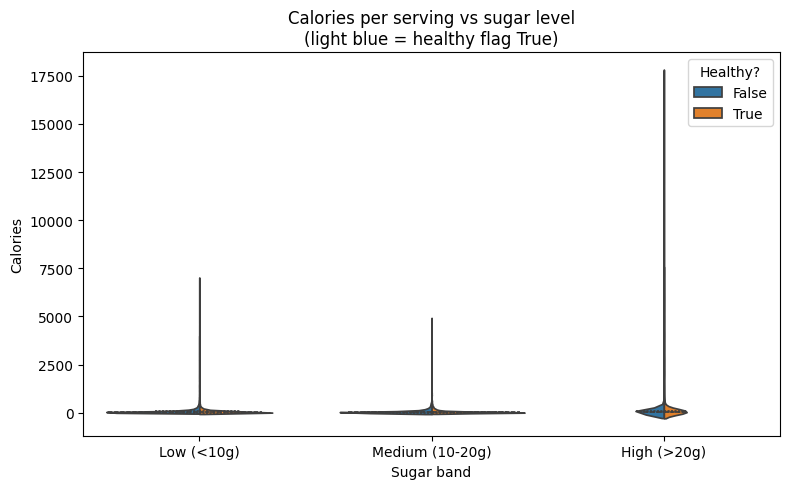

In [4]:
df['SugarBand'] = pd.cut(df['SugarContent'],
                         bins=[-np.inf,10,20,np.inf],
                         labels=['Low (<10g)','Medium (10-20g)','High (>20g)'])

plt.figure(figsize=(8,5))
sns.violinplot(x='SugarBand', y='Calories_per_Serving',
               hue='Contains_Healthy', data=df,
               split=True, inner='quartile')
plt.title('Calories per serving vs sugar level\n(light blue = healthy flag True)')
plt.xlabel('Sugar band'); plt.ylabel('Calories')
plt.legend(title='Healthy?')
plt.tight_layout(); plt.show()

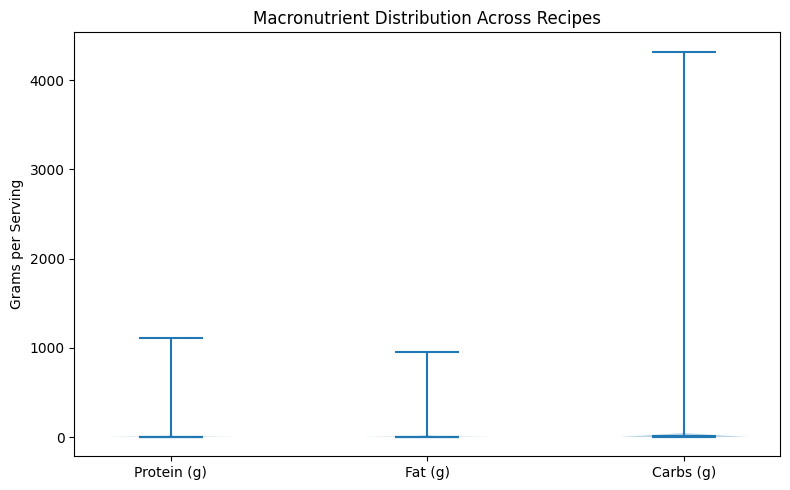

In [5]:
import matplotlib.pyplot as plt
import pandas as pd


col_map = {
    'Protein': 'Protein_per_Serving',
    'Fat'    : 'Fat_per_Serving',
    'Carbs'  : 'Carbs_per_Serving'
}


for macro, fallback_list in {
        'Protein': ['ProteinContent', 'ProteinDensity'],
        'Fat'    : ['FatContent'],
        'Carbs'  : ['CarbohydrateContent']}.items():
    if col_map[macro] not in df.columns:
        for alt in fallback_list:
            if alt in df.columns:
                col_map[macro] = alt
                break


data = [
    df[col_map['Protein']].dropna().values,
    df[col_map['Fat']].dropna().values,
    df[col_map['Carbs']].dropna().values
]


plt.figure(figsize=(8, 5))
plt.violinplot(data, showmeans=True, showmedians=True, showextrema=True)
plt.xticks([1, 2, 3], ['Protein (g)', 'Fat (g)', 'Carbs (g)'])
plt.ylabel('Grams per Serving')
plt.title('Macronutrient Distribution Across Recipes')
plt.tight_layout()
plt.show()

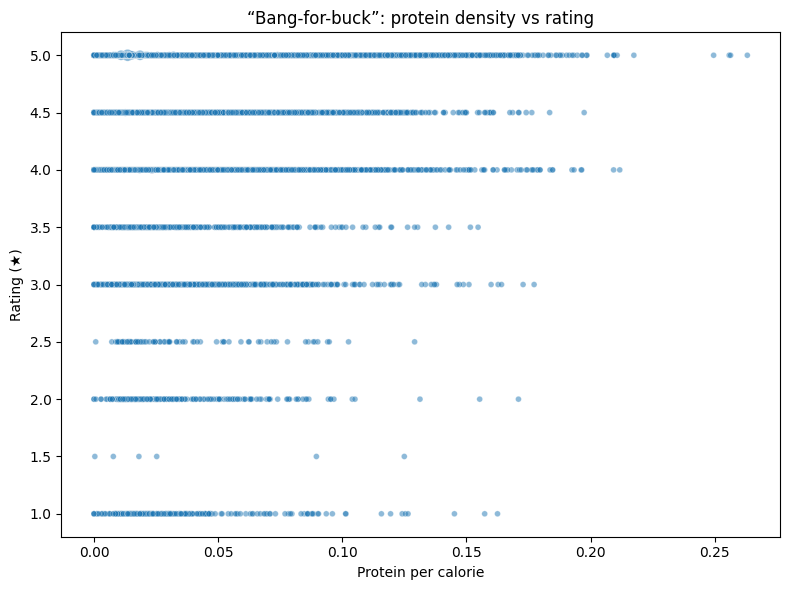

In [6]:
df['ProteinDensity'] = df['Protein_per_Serving'] / df['Calories_per_Serving']
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='ProteinDensity', y='AggregatedRating',
                size='ReviewCount', alpha=.5, legend=False)
plt.title('“Bang-for-buck”: protein density vs rating')
plt.xlabel('Protein per calorie'); plt.ylabel('Rating (★)')
plt.tight_layout(); plt.show()

In [7]:

import plotly.express as px


category_ratings = df.groupby('RecipeCategory')['AggregatedRating'].mean()


treemap_data = df.groupby('RecipeCategory').size().reset_index(name='count')
treemap_data['AggregatedRating'] = treemap_data['RecipeCategory'].map(category_ratings)


fig = px.treemap(treemap_data,
                 path=['RecipeCategory'],
                 values='count',
                 color='AggregatedRating',
                 color_continuous_scale='RdBu',
                 title='Recipe Categories by Count and Mean Aggregated Rating')
fig.show()


In [8]:
def classify_goal(row):
    if row['Calories_per_Serving'] <= 400:
        return 'weight loss'
    if row['Protein_per_Serving'] >= 25 and row['Calories_per_Serving'] >= 300:
        return 'muscle gain'
    return 'maintenance'

df['WorkoutGoal'] = df.apply(classify_goal, axis=1)


In [9]:
flow_df = (
    df[['WorkoutGoal', 'RecipeCategory', 'RecipeIngredientParts_List']]
      .explode('RecipeIngredientParts_List')
      .rename(columns={'RecipeIngredientParts_List': 'Ingredient'})
      .dropna(subset=['Ingredient'])                       # safety
      .assign(Ingredient=lambda d: d['Ingredient'].str.lower().str.strip())
)
top_ing_by_cat = (
    flow_df.groupby('RecipeCategory')['Ingredient']
           .agg(lambda x: x.value_counts().idxmax())
           .to_dict()
)


In [10]:
import pandas as pd
import ast, re, plotly.graph_objects as go


def to_ingredient_list(x):
    if isinstance(x, list):
        return x
    if pd.isna(x):
        return []
    s = str(x).strip()
    if s.startswith('[') and s.endswith(']'):
        return ast.literal_eval(s)
    if re.match(r'^c\(.+\)$', s):
        return ast.literal_eval('[' + s[2:-1] + ']')
    return [i.strip() for i in s.split(',') if i.strip()]

df['WorkoutGoal'] = df.apply(
    lambda r: ('weight loss' if r['Calories_per_Serving'] <= 400 else
               'muscle gain' if (r['Protein_per_Serving'] >= 25 and
                                  r['Calories_per_Serving'] >= 300)
               else 'maintenance'),
    axis=1
)

flow_df = (
    df[['WorkoutGoal', 'RecipeCategory', 'RecipeIngredientParts_List']]
      .assign(IngredientList=lambda d: d['RecipeIngredientParts_List']
                                       .apply(to_ingredient_list))
      .explode('IngredientList')
      .rename(columns={'IngredientList': 'Ingredient'})
      .dropna(subset=['Ingredient'])
      .assign(Ingredient=lambda d: d['Ingredient'].str.lower().str.strip())
)


STOP_INGS = {'salt', 'sugar', 'white sugar', 'granulated sugar',
             'brown sugar', 'water'}

flow_df = flow_df[~flow_df['Ingredient'].isin(STOP_INGS)].copy()


TOP_K = 12
top_cats = (flow_df.groupby('RecipeCategory').size()
                       .nlargest(TOP_K).index)

flow_df['RecipeCategory'] = flow_df['RecipeCategory'].where(
    flow_df['RecipeCategory'].isin(top_cats), other='Other'
)


top_ing_by_cat = (
    flow_df.groupby('RecipeCategory')['Ingredient']
           .agg(lambda x: x.value_counts().idxmax())
           .to_dict()
)


workout_nodes   = sorted(flow_df['WorkoutGoal'].unique())
category_nodes  = sorted(flow_df['RecipeCategory'].unique())
ingredient_nodes = sorted(set(top_ing_by_cat.values()))
nodes = workout_nodes + category_nodes + ingredient_nodes
node_idx = {n: i for i, n in enumerate(nodes)}


wg_cat_links = (flow_df.groupby(['WorkoutGoal', 'RecipeCategory'])
                        .size()
                        .reset_index(name='count'))
wg_cat_sources = wg_cat_links['WorkoutGoal'].map(node_idx)
wg_cat_targets = wg_cat_links['RecipeCategory'].map(node_idx)
wg_cat_values  = wg_cat_links['count']


cat_ing_links = (
    flow_df[['RecipeCategory']].drop_duplicates()
        .assign(Ingredient=lambda d: d['RecipeCategory'].map(top_ing_by_cat))
        .merge(wg_cat_links.groupby('RecipeCategory')['count'].sum()
                              .reset_index(), on='RecipeCategory')
)
cat_ing_sources = cat_ing_links['RecipeCategory'].map(node_idx)
cat_ing_targets = cat_ing_links['Ingredient'].map(node_idx)
cat_ing_values  = cat_ing_links['count']

fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=18,
        line=dict(width=0.4),
        label=nodes,
        color="lightblue"
    ),
    link=dict(
        source=list(wg_cat_sources) + list(cat_ing_sources),
        target=list(wg_cat_targets) + list(cat_ing_targets),
        value =list(wg_cat_values)  + list(cat_ing_values)
    )
)])

fig.update_layout(
    title_text="Workout Goals → Recipe Categories → Most‑Common Ingredient",
    font_size=10,
    height=600,
    width=960
)

fig.show()


In [11]:
import ast, re

def to_ingredient_list(x):
    if isinstance(x, list):
        return x                        # already good
    if pd.isna(x):
        return []

    s = str(x).strip()

    # Case A: normal Python‑repr list  ['egg', 'milk']
    if s.startswith('[') and s.endswith(']'):
        return ast.literal_eval(s)

    # Case B: R vector  c("egg", "milk")
    if re.match(r'^c\(.+\)$', s):
        py_literal = '[' + s[2:-1] + ']'
        return ast.literal_eval(py_literal)

    # Fallback: comma‑separated string
    return [i.strip() for i in s.split(',') if i.strip()]

df['ingredients_list'] = (
    df['RecipeIngredientParts_List']
      .apply(to_ingredient_list)
      .apply(lambda lst: [i.lower().strip() for i in lst])   # normalise
)

<ipython-input-12-9b3925346e26>:71: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



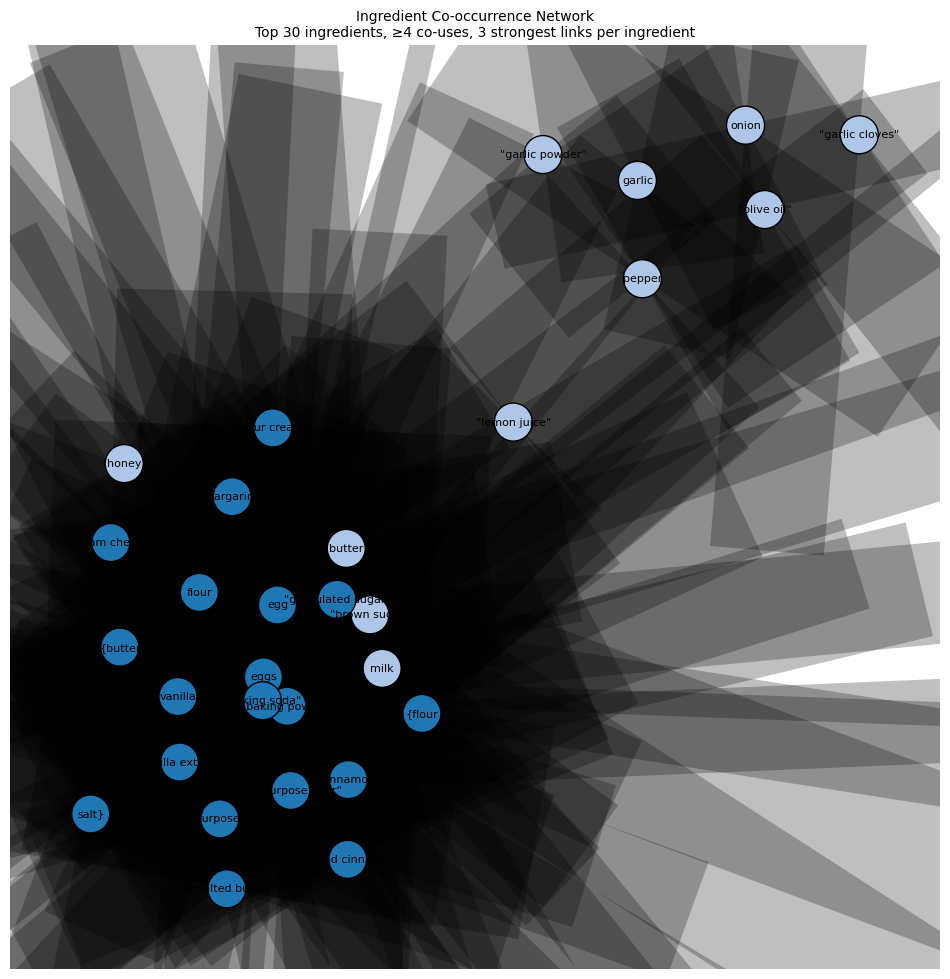

In [12]:

import pandas as pd, numpy as np, re, ast, itertools
import networkx as nx, matplotlib.pyplot as plt
from collections import Counter, defaultdict
from networkx.algorithms.community import greedy_modularity_communities

STOP_INGS        = {'salt', 'water', 'sugar'}
TOP_N            = 30
MIN_EDGE_FREQ    = 4
TOP_K_NEIGHBOR   = 3
EDGE_ALPHA       = 0.25
FONT_SIZE        = 8
SEED             = 13



def to_list(x):
    """
    Accepts:
      - real Python list          ['egg','milk']
      - Python repr string        "['egg','milk']"
      - R vector string           'c("egg","milk")'
      - comma‑separated string    "egg, milk"
    Returns a list[str] (possibly empty).
    """
    if isinstance(x, list):
        return x
    if pd.isna(x):
        return []
    s = str(x).strip()
    if s.startswith('[') and s.endswith(']'):
        return ast.literal_eval(s)
    if re.match(r'^c\(.+\)$', s):
        return ast.literal_eval('[' + s[2:-1] + ']')
    return [i.strip() for i in s.split(',') if i.strip()]



df['ingredients_list'] = (
    df['RecipeIngredientParts_List']
      .apply(to_list)
      .apply(lambda lst: [i.lower().strip() for i in lst
                          if i and i.lower().strip() not in STOP_INGS])
)


all_counts = Counter(itertools.chain.from_iterable(df['ingredients_list']))
top_ing_set = {ing for ing, _ in all_counts.most_common(TOP_N)}

pair_counts = Counter()
for lst in df['ingredients_list']:
    filt = [i for i in set(lst) if i in top_ing_set]
    pair_counts.update(itertools.combinations(sorted(filt), 2))


pair_counts = {pair: w for pair, w in pair_counts.items() if w >= MIN_EDGE_FREQ}

best_edges = defaultdict(dict)
for (a, b), w in pair_counts.items():
    best_edges[a][b] = w
    best_edges[b][a] = w

pruned_edges = {}
for n, nbrs in best_edges.items():
    for nbr, w in sorted(nbrs.items(), key=lambda t: -t[1])[:TOP_K_NEIGHBOR]:
        pruned_edges[tuple(sorted((n, nbr)))] = w


G = nx.Graph(((u, v, {'weight': w}) for (u, v), w in pruned_edges.items()))


palette = plt.cm.get_cmap('tab20', 20)
communities = list(greedy_modularity_communities(G))
node_color = {n: palette(i) for i, com in enumerate(communities) for n in com}


plt.figure(figsize=(12, 12))
k_val = 1.2 / np.sqrt(G.number_of_nodes())
pos   = nx.spring_layout(G, k=k_val, seed=SEED)

nx.draw_networkx_nodes(
    G, pos,
    node_size=750,
    node_color=[node_color[n] for n in G.nodes()],
    edgecolors='black'
)
nx.draw_networkx_edges(
    G, pos,
    width=[d['weight'] for *_, d in G.edges(data=True)],
    alpha=EDGE_ALPHA
)
nx.draw_networkx_labels(G, pos, font_size=FONT_SIZE)

plt.title(f"Ingredient Co‑occurrence Network\n"
          f"Top {TOP_N} ingredients, ≥{MIN_EDGE_FREQ} co‑uses, "
          f"{TOP_K_NEIGHBOR} strongest links per ingredient",
          fontsize=FONT_SIZE+2)
plt.axis('off')
plt.show()


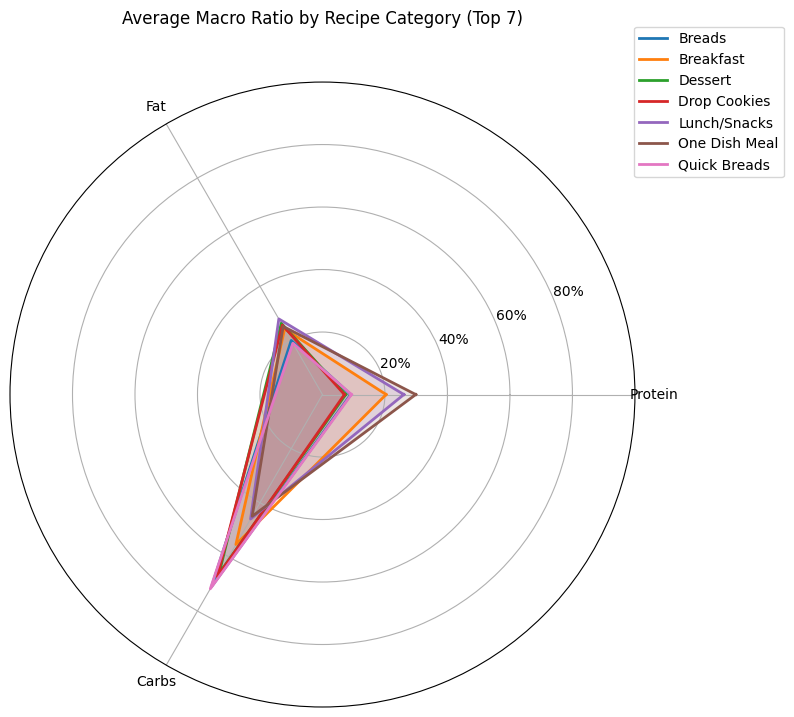

In [13]:
TOP_K_CATEGORIES = 7

macro_candidates = {
    'Protein': ['Protein_per_Serving', 'ProteinContent', 'ProteinDensity'],
    'Fat':     ['Fat_per_Serving', 'FatContent'],
    'Carbs':   ['Carbs_per_Serving', 'CarbohydrateContent']
}

macro_cols = {}
for macro, cand_list in macro_candidates.items():
    for col in cand_list:
        if col in df.columns:
            macro_cols[macro] = col
            break

if len(macro_cols) < 3:
    raise ValueError(
        "Could not find Protein, Fat and Carbs columns. "
        "Check `macro_candidates` mapping."
    )
top_categories = (
    df['RecipeCategory']
      .value_counts()
      .head(TOP_K_CATEGORIES)
      .index
      .tolist()
)

sub_df = df[df['RecipeCategory'].isin(top_categories)].copy()

mean_macros = (
    sub_df.groupby('RecipeCategory')[list(macro_cols.values())]
          .mean()
          .rename(columns={v: k for k, v in macro_cols.items()})
)

ratio_df = mean_macros.div(mean_macros.sum(axis=1), axis=0) * 100

labels = ['Protein', 'Fat', 'Carbs']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for category in ratio_df.index:
    values = ratio_df.loc[category].tolist()
    values += values[:1]  # close polygon
    ax.plot(angles, values, label=category, linewidth=2)
    ax.fill(angles, values, alpha=0.15)  # translucent fill


ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([20, 40, 60, 80])
ax.set_yticklabels(['20%', '40%', '60%', '80%'])
ax.set_ylim(0, 100)

plt.title(f'Average Macro Ratio by Recipe Category (Top {TOP_K_CATEGORIES})', y=1.08)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1))
plt.tight_layout()
plt.show()